In [24]:
import pandas as pd
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.shape



(2111, 17)

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GroupShuffleSplit, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [138]:
df.dtypes


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [139]:
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [140]:
df.sample(10, random_state=42)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1313,Female,18.603496,1.681719,90.671871,yes,yes,1.524428,3.000000,Sometimes,no,1.383831,no,0.130417,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
1739,Male,31.199261,1.848845,125.077863,yes,yes,2.496190,3.000000,Sometimes,yes,1.662117,no,0.992371,0.217632,Sometimes,Public_Transportation,Obesity_Type_II
382,Female,16.000000,1.610000,65.000000,yes,yes,1.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Public_Transportation,Overweight_Level_I
584,Male,17.210933,1.819557,58.325122,yes,yes,2.559600,4.000000,Sometimes,no,2.000000,no,2.000000,0.331483,no,Automobile,Insufficient_Weight
1711,Male,26.734476,1.816197,119.622764,yes,yes,2.247037,3.000000,Sometimes,no,2.718408,no,0.763595,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
879,Female,21.000000,1.618148,68.981403,yes,yes,1.142468,3.000000,no,no,2.197732,no,0.827506,0.572877,Sometimes,Public_Transportation,Overweight_Level_I
237,Male,33.000000,1.850000,99.000000,yes,yes,2.000000,3.000000,Sometimes,yes,3.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
1823,Female,25.930376,1.610086,102.387450,yes,yes,3.000000,3.000000,Sometimes,no,1.050564,no,0.026033,0.539074,Sometimes,Public_Transportation,Obesity_Type_III
613,Male,16.496978,1.691206,50.000000,no,yes,2.000000,1.630846,Sometimes,no,2.975528,no,0.548991,0.369134,Sometimes,Public_Transportation,Insufficient_Weight
51,Female,20.000000,1.500000,44.000000,no,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight


In [141]:
df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

EDA

In [142]:
unique_summary = []

for col in df.columns:
    uniq_vals = df[col].unique()
    n_unique = len(uniq_vals)
    examples = uniq_vals[:10]
    unique_summary.append([col, n_unique, examples])

unique_df = pd.DataFrame(unique_summary, columns=["Колонка", "Кол-во уникальных", "Примеры"])
unique_df


,Колонка,Кол-во уникальных,Примеры
0,Gender,2,"[Female, Male]"
1,Age,1402,"[21.0, 23.0, 27.0, 22.0, 29.0, 24.0, 26.0, 41...."
2,Height,1574,"[1.62, 1.52, 1.8, 1.78, 1.5, 1.64, 1.72, 1.85,..."
3,Weight,1525,"[64.0, 56.0, 77.0, 87.0, 89.8, 53.0, 55.0, 68...."
4,family_history_with_overweight,2,"[yes, no]"
5,FAVC,2,"[no, yes]"
6,FCVC,810,"[2.0, 3.0, 1.0, 2.450218, 2.880161, 2.00876, 2..."
7,NCP,635,"[3.0, 1.0, 4.0, 3.28926, 3.995147, 1.72626, 2...."
8,CAEC,4,"[Sometimes, Frequently, Always, no]"
9,SMOKE,2,"[no, yes]"


Антропометрия

Gender — пол (Male / Female).

Age — возраст (в годах).

Height — рост (в метрах).

Weight — вес (в килограммах).

Генетика

family_history_with_overweight — есть ли в семье люди с избыточным весом (yes / no).


Питание

FAVC (Frequent consumption of high caloric food) — часто ли человек ест калорийную еду (yes / no).

FCVC (Frequency of vegetable consumption) — как часто человек ест овощи (1 = редко, 3 = часто).

NCP (Number of main meals) — сколько основных приёмов пищи в день (1–4).

CAEC (Consumption of food between meals) — перекусы (No, Sometimes, Frequently, Always).

CH2O — количество выпиваемой воды в день (1–3 литра).

CALC (Consumption of alcohol) — употребление алкоголя (No, Sometimes, Frequently, Always).

SCC (Calories consumption monitoring) — следит ли человек за калориями (yes / no).

Привычки и образ жизни

SMOKE — курение (yes / no).

FAF (Physical activity frequency) — уровень физической активности (0 = нет, 3 = высокая активность).

TUE (Time using technology devices) — сколько времени проводит за компьютером/гаджетами (0–2).

MTRANS (Transportation used) — используемый транспорт (Walking, Bike, Public_Transportation, Automobile, Motorbike).

Целевая переменная

NObeyesdad — уровень ожирения (7 классов):

Insufficient_Weight — недостаточный вес.

Normal_Weight — нормальный вес.

Overweight_Level_I — избыточный вес I уровня.

Overweight_Level_II — избыточный вес II уровня.

Obesity_Type_I — ожирение I степени.

Obesity_Type_II — ожирение II степени.

Obesity_Type_III — ожирение III степени.

In [143]:
before = df.shape[0]
dup_cnt = df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape[0]
before, dup_cnt, after


(2087, 0, 2087)

In [144]:
df["NObeyesdad"].value_counts(), df["NObeyesdad"].value_counts(normalize=True)*100


(NObeyesdad
 Obesity_Type_I         351
 Obesity_Type_III       324
 Obesity_Type_II        297
 Overweight_Level_II    290
 Normal_Weight          282
 Overweight_Level_I     276
 Insufficient_Weight    267
 Name: count, dtype: int64,
 NObeyesdad
 Obesity_Type_I         16.818400
 Obesity_Type_III       15.524677
 Obesity_Type_II        14.230954
 Overweight_Level_II    13.895544
 Normal_Weight          13.512218
 Overweight_Level_I     13.224724
 Insufficient_Weight    12.793483
 Name: proportion, dtype: float64)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

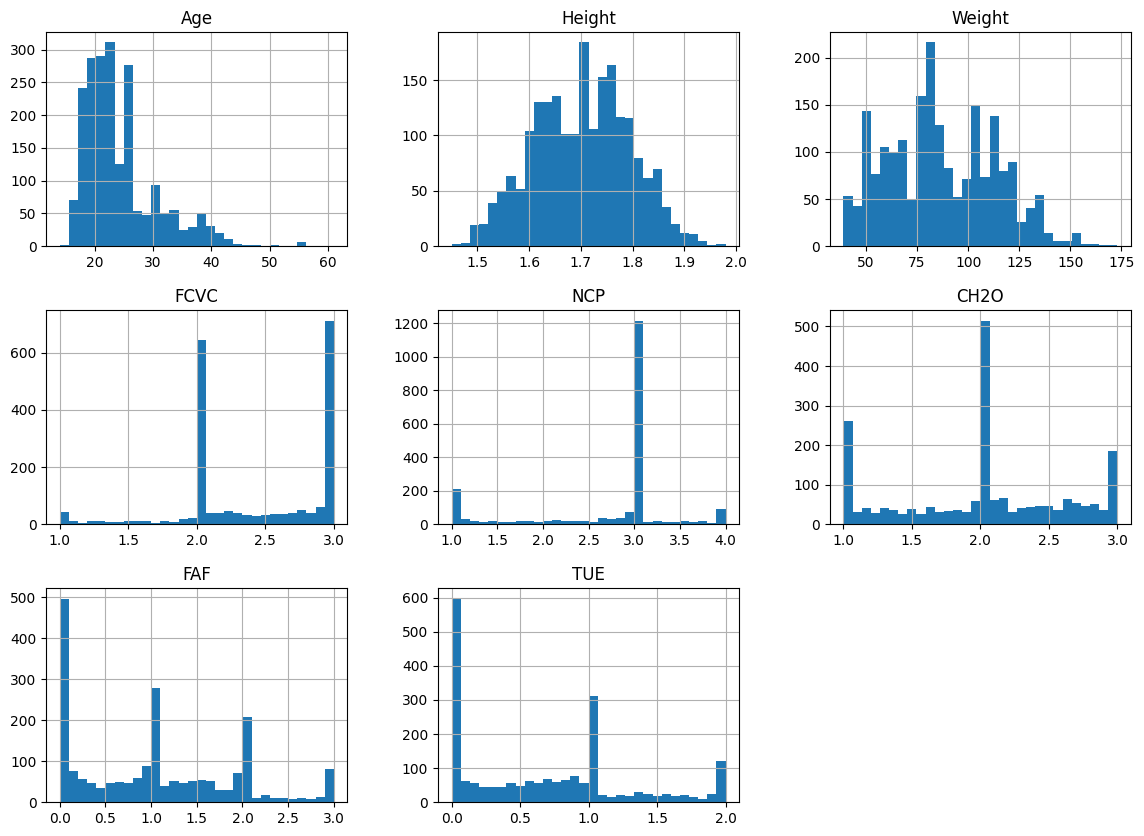

In [145]:
df.select_dtypes(include=["int64","float64"]).hist(figsize=(14,10), bins=30)


<Axes: >

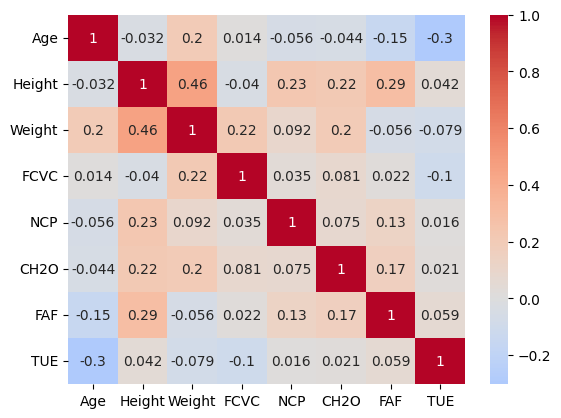

In [146]:
num_only = df.select_dtypes(include=["int64","float64"])
sns.heatmap(num_only.corr(), annot=True, cmap="coolwarm", center=0)


In [147]:
df_corr = df.copy()
df_corr["NObeyesdad_num"] = le.fit_transform(df_corr["NObeyesdad"])
num_cols_corr = df_corr.select_dtypes(include=["number"]).columns
df_corr[num_cols_corr].corr()["NObeyesdad_num"].drop("NObeyesdad_num").sort_values(ascending=False)


Weight    0.388802
Age       0.238308
CH2O      0.092616
Height    0.038700
FCVC      0.025728
TUE      -0.064876
NCP      -0.088235
FAF      -0.135192
Name: NObeyesdad_num, dtype: float64

 1. Корреляция числовых признаков между собой

Weight и Height = 0.46 → рост и вес связаны (логично: выше рост → выше вес).

Age и Weight = 0.20 → с возрастом вес растёт.

FAF и Height = 0.29 → более высокие люди чаще активнее.

TUE и Age = –0.30 → молодые больше сидят за гаджетами.

Остальные корреляции слабые (<0.2), значит признаки достаточно независимы 

 2. Корреляция с таргетом (NObeyesdad_num)

Weight = 0.39 → чем больше вес, тем выше вероятность ожирения.

Age = 0.23 → с возрастом риск увеличивается.

CH2O (вода) = 0.09 → слабая положительная связь

Height = 0.04 → почти не влияет.

FCVC (овощи) = 0.02 → очень слабая положительная.

TUE (экран) = –0.06 → больше гаджетов → выше риск, но связь слабая.

NCP (приёмы пищи) = –0.09 → больше приёмов пищи → меньше риск ожирения.

FAF (спорт) = –0.13 → спорт снижает риск ожирения.

Предобработка


In [148]:
y = df["NObeyesdad"]
X = df.drop(columns=["NObeyesdad"])

num_cols = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
cat_cols = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]


In [149]:
le = LabelEncoder()
y_enc = le.fit_transform(y)


In [150]:
pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])


In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)

X_train.shape, X_test.shape, len(y_train), len(y_test)


((1669, 16), (418, 16), 1669, 418)

Обучение

In [152]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"acc":"accuracy","f1":"f1_macro"}


In [153]:
clf_lr = Pipeline([
    ("pre", pre),
    ("model", LogisticRegression(max_iter=2000, n_jobs=-1))
])

res_lr = cross_validate(
    clf_lr, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1, return_estimator=False
)

res_lr["test_acc"].mean(), res_lr["test_f1"].mean(), res_lr["test_acc"], res_lr["test_f1"]


(0.868777759795724,
 0.8629687430110803,
 array([0.85329341, 0.91317365, 0.84131737, 0.87724551, 0.85885886]),
 array([0.84433026, 0.90811243, 0.83433721, 0.873615  , 0.85444881]))

In [154]:
clf_dt = Pipeline([("pre", pre), ("model", DecisionTreeClassifier(random_state=42))])
res_dt = cross_validate(clf_dt, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
res_dt["test_acc"].mean(), res_dt["test_f1"].mean(), res_dt["test_acc"], res_dt["test_f1"]


(0.9185035334735933,
 0.9163039395693865,
 array([0.91017964, 0.94610778, 0.91017964, 0.9251497 , 0.9009009 ]),
 array([0.90677749, 0.94360354, 0.91012916, 0.92212145, 0.89888805]))

In [155]:
clf_rf = Pipeline([("pre", pre), ("model", RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))])
res_rf = cross_validate(clf_rf, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
res_rf["test_acc"].mean(), res_rf["test_f1"].mean(), res_rf["test_acc"], res_rf["test_f1"]


(0.9358903813993635,
 0.9339405619789801,
 array([0.93712575, 0.94610778, 0.92215569, 0.93712575, 0.93693694]),
 array([0.93372887, 0.94479228, 0.92014362, 0.93551515, 0.93552288]))

In [156]:
clf_knn = Pipeline([("pre", pre), ("model", KNeighborsClassifier(n_neighbors=15))])
res_knn = cross_validate(clf_knn, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
res_knn["test_acc"].mean(), res_knn["test_f1"].mean(), res_knn["test_acc"], res_knn["test_f1"]


(0.7675298052543562,
 0.7408551585889273,
 array([0.76047904, 0.77245509, 0.76946108, 0.76047904, 0.77477477]),
 array([0.73281283, 0.74475399, 0.73361906, 0.7380641 , 0.75502581]))

Подбор гиперпараметров


In [157]:
param_dist_rf = {
    "model__n_estimators": [200,300,400,500,700,900],
    "model__max_depth": [None,5,10,15,20,30],
    "model__min_samples_split": [2,5,10,20],
    "model__min_samples_leaf": [1,2,4,8],
    "model__max_features": ["sqrt","log2",None],
    "model__bootstrap": [True, False]
}

rf_pipe = Pipeline([("pre", pre), ("model", RandomForestClassifier(random_state=42, n_jobs=-1))])

search_rf = RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_dist_rf,
    n_iter=40,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    random_state=42,
    refit=True
)
search_rf.fit(X_train, y_train)
best_rf = search_rf.best_estimator_
pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf, average="macro")
search_rf.best_params_, search_rf.best_score_, acc_rf, f1_rf


({'model__n_estimators': 400,
  'model__min_samples_split': 2,
  'model__min_samples_leaf': 1,
  'model__max_features': None,
  'model__max_depth': None,
  'model__bootstrap': True},
 0.9480464247746688,
 0.9688995215311005,
 0.9679893230254127)

In [158]:
param_grid_dt = {
    "model__criterion": ["gini","entropy","log_loss"],
    "model__max_depth": [None,5,10,15,20,30],
    "model__min_samples_split": [2,5,10,20],
    "model__min_samples_leaf": [1,2,4,8],
    "model__ccp_alpha": [0.0, 0.0005, 0.001, 0.005, 0.01]
}

dt_pipe = Pipeline([("pre", pre), ("model", DecisionTreeClassifier(random_state=42))])

grid_dt = GridSearchCV(
    dt_pipe,
    param_grid=param_grid_dt,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    refit=True
)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
pred_dt = best_dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt, average="macro")
grid_dt.best_params_, grid_dt.best_score_, acc_dt, f1_dt


({'model__ccp_alpha': 0.0,
  'model__criterion': 'entropy',
  'model__max_depth': 10,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 2},
 0.934934260571193,
 0.9593301435406698,
 0.9582685316592977)

In [159]:
param_grid_lr = {
    "model__C": [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs","saga"],
    "model__class_weight": [None, "balanced"]
}

lr_pipe = Pipeline([("pre", pre), ("model", LogisticRegression(max_iter=3000, n_jobs=-1))])

grid_lr = GridSearchCV(
    lr_pipe,
    param_grid=param_grid_lr,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    refit=True
)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
pred_lr = best_lr.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr, average="macro")
grid_lr.best_params_, grid_lr.best_score_, acc_lr, f1_lr


({'model__C': 100,
  'model__class_weight': 'balanced',
  'model__penalty': 'l2',
  'model__solver': 'saga'},
 0.9533757794696051,
 0.9521531100478469,
 0.9517144304118978)

Интерпретация


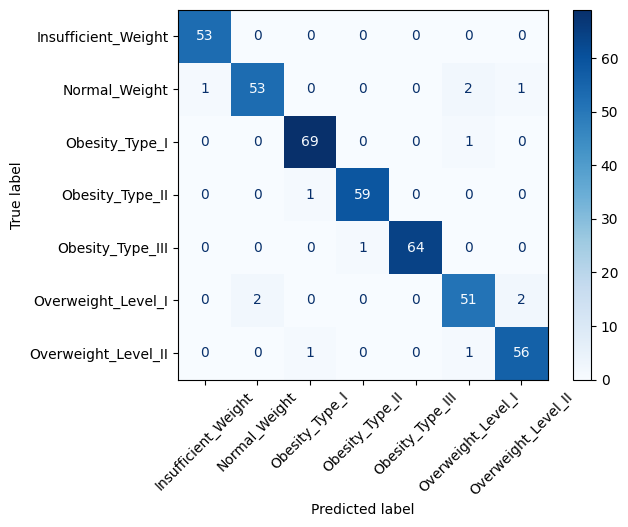

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.show()


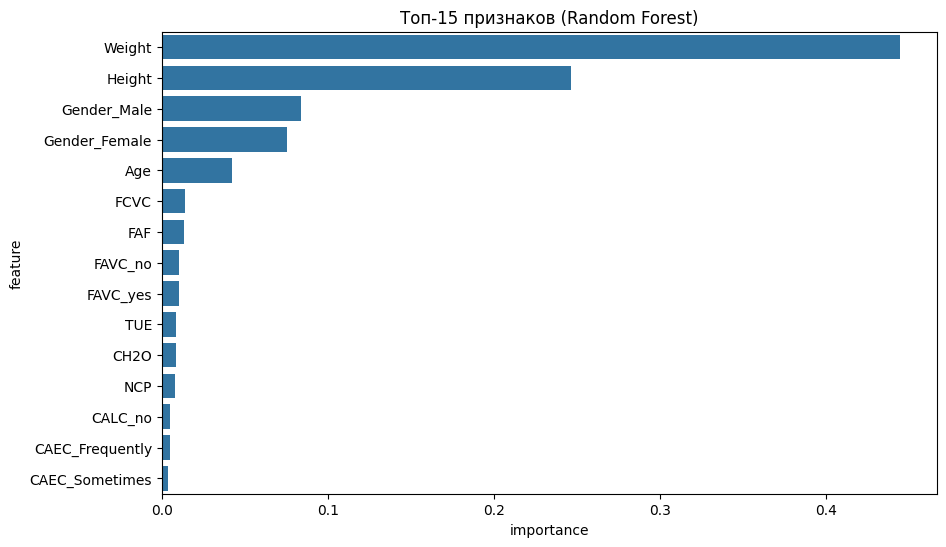

In [161]:
importances = best_rf.named_steps["model"].feature_importances_
feature_names = (
    num_cols + 
    list(best_rf.named_steps["pre"].named_transformers_["cat"].get_feature_names_out(cat_cols))
)

feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feat_imp.head(15))
plt.title("Топ-15 признаков (Random Forest)")
plt.show()


In [162]:
import shap
X_tr_t = best_rf.named_steps["pre"].transform(X_train)
X_te_t = best_rf.named_steps["pre"].transform(X_test)
feat_names = list(best_rf.named_steps["pre"].get_feature_names_out())
rf = best_rf.named_steps["model"]
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_te_t)


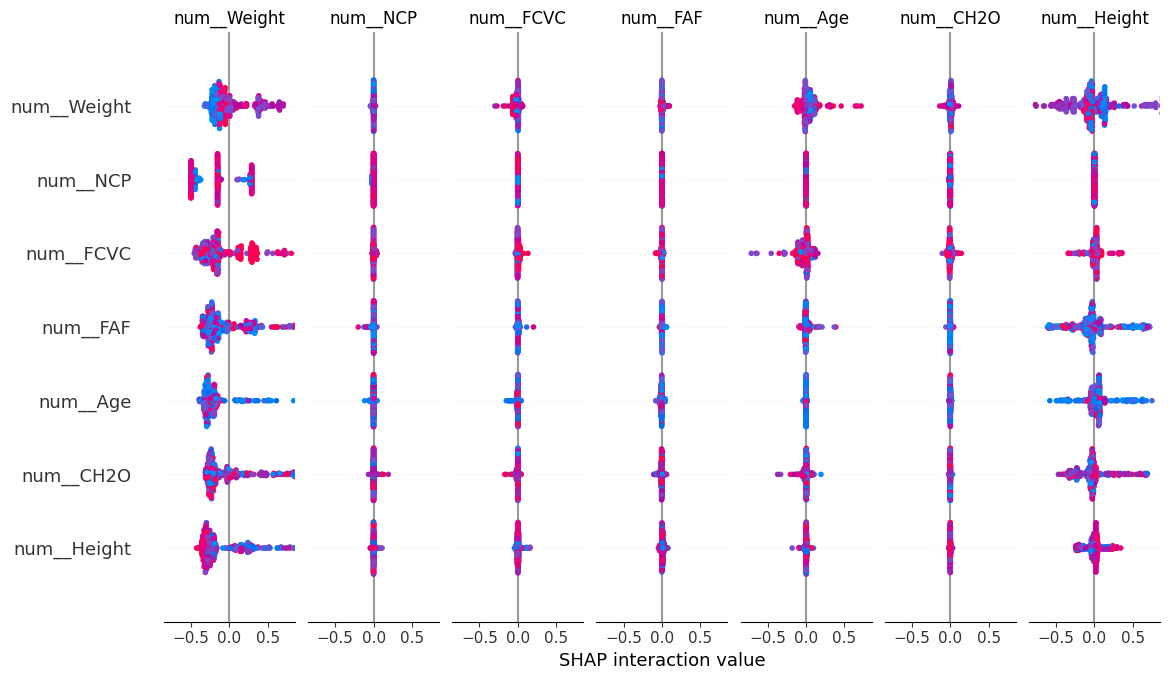

In [163]:
shap.summary_plot(shap_values, X_te_t, feature_names=feat_names)


In [167]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv").drop_duplicates().reset_index(drop=True)

y = df["NObeyesdad"]
X = df.drop(columns=["NObeyesdad"])

num_cols = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
cat_cols = ["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

pre = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([("pre", pre), ("model", rf)])
pipe.fit(X, y_enc)

os.makedirs("models", exist_ok=True)
joblib.dump(pipe, "models/model.joblib")
joblib.dump(le, "models/label_encoder.joblib")

['models/label_encoder.joblib']